In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 7.3 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from ultralytics import YOLO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [5]:
# data directory
DATA_DIR = '/content/drive/MyDrive/yolov8'

#### Benign Breast Images

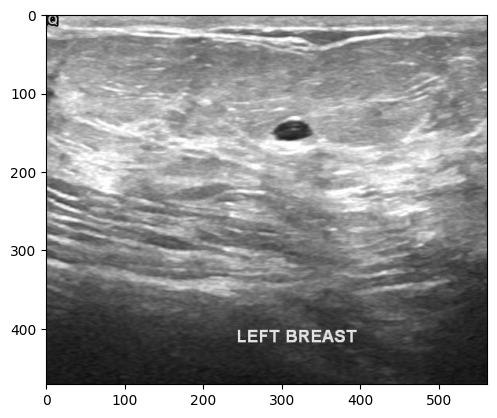

In [6]:
# reading the image
benign = img.imread('/content/drive/MyDrive/yolov8/train/benign/benign (1).png')

# displaying the image
plt.imshow(benign)

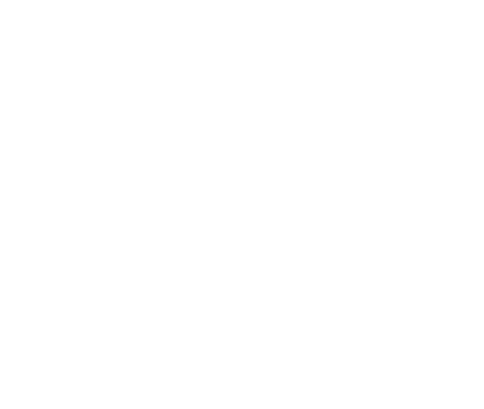

In [18]:
negative =255- benign # neg = (L-1) - img

plt.figure(figsize= (6,6))
plt.imshow(negative);
plt.axis('off');

### Malignant **Images**

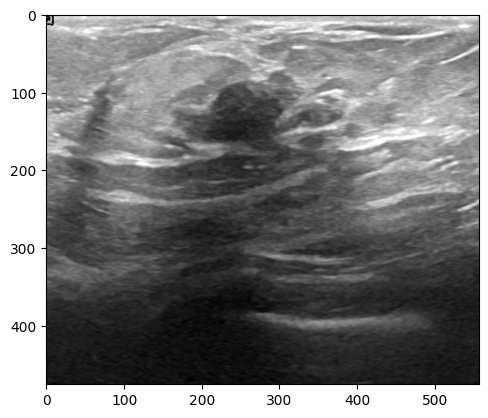

In [16]:
# reading the image
malignant = img.imread('/content/drive/MyDrive/yolov8/train/malignant/malignant (100).png')

# displaying the image
plt.imshow(malignant)

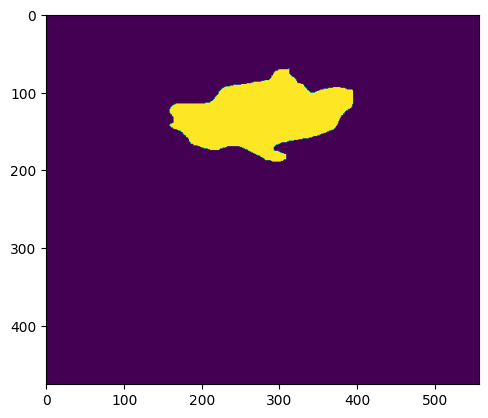

In [33]:
# reading the image
malignant = img.imread('/content/drive/MyDrive/yolov8/train/malignant/malignant (100)_mask.png')

# displaying the image
plt.imshow(malignant)

# #### Malignant Image Negative

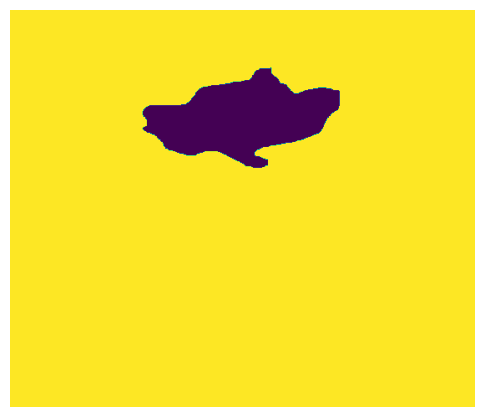

In [20]:
negative =255- malignant # neg = (L-1) - img

plt.figure(figsize= (6,6))
plt.imshow(negative);
plt.axis('off');

#### Malignant Log transformation

In [24]:
print('Image dimensions:', malignant.shape)

Image dimensions: (476, 557)


### Normal Breast Images

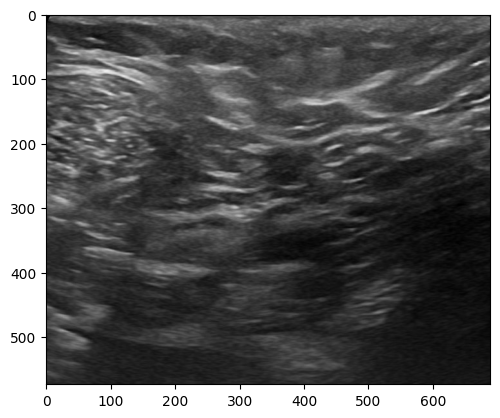

In [10]:
# reading the image
normal = img.imread('/content/drive/MyDrive/yolov8/train/normal/normal (100).png')

# displaying the image
plt.imshow(normal)

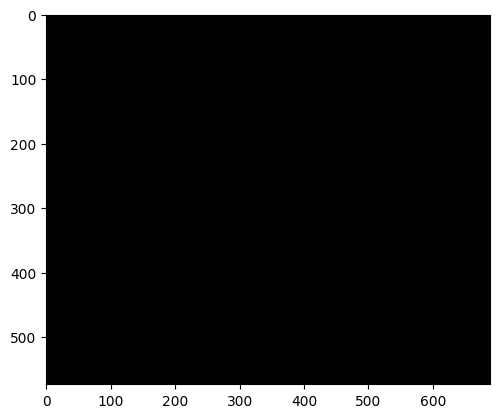

In [11]:
# reading the image
normal_mask = img.imread('/content/drive/MyDrive/yolov8/train/normal/normal (100)_mask.png')

# displaying the image
plt.imshow(normal_mask)

### Modelling data with Yolo8

In [ ]:
model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)

100%|██████████| 5.28M/5.28M [00:00<00:00, 59.1MB/s]


In [ ]:
DATA_DIR = '/content/drive/MyDrive/yolov8'

In [ ]:
# Train the model
results = model.train(data=DATA_DIR, epochs=10, imgsz=64)

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/yolov8, epochs=10, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, 

In [ ]:
!mkdir '/content/drive/MyDrive/yolov8_runs'

In [ ]:
# save the trained model
!scp -r /content/runs '/content/drive/MyDrive/yolov8_runs'

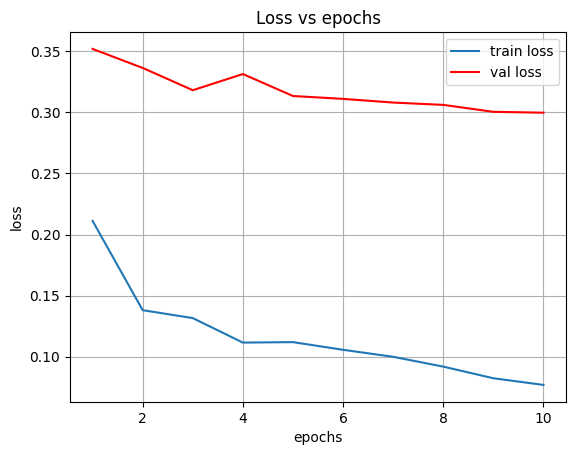

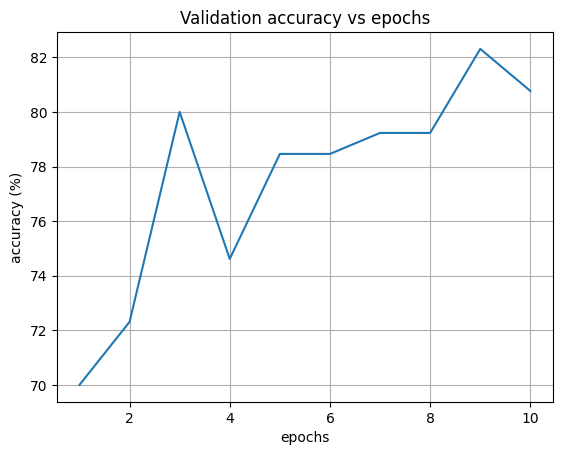

In [ ]:
results_path = '/content/drive/MyDrive/yolov8_runs/runs/classify/train2/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

In [ ]:
##prediction
model = YOLO('/content/drive/MyDrive/yolov8_runs/runs/classify/train2/weights/best.pt')  # load a custom model

results = model('/content/drive/MyDrive/yolov8/val/malignant/malignant (14)_mask.png')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])


image 1/1 /content/drive/MyDrive/yolov8/val/malignant/malignant (14)_mask.png: 64x64 malignant 0.98, benign 0.02, normal 0.00, 9.2ms
Speed: 3.2ms preprocess, 9.2ms inference, 0.2ms postprocess per image at shape (1, 3, 64, 64)


{0: 'benign', 1: 'malignant', 2: 'normal'}
[0.020313283428549767, 0.9778401255607605, 0.001846558996476233]
malignant
